In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [3]:
citydata="pyber/raw_data/city_data.csv"
citydf=pd.read_csv(citydata)
citydf.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ridedata="pyber/raw_data/ride_data.csv"
ridedf=pd.read_csv(ridedata)
ridedf.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
cityRide=pd.merge(ridedf, citydf, how="left", on=['city','city'])
cityRide.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [6]:
urbancities=cityRide[cityRide["type"]=="Urban"]
suburbancities=cityRide[cityRide["type"]=="Suburban"]
ruralcities=cityRide[cityRide["type"]=="Rural"]

In [7]:
urbanRideCount=urbancities.groupby(["city"]).count()["ride_id"]
urbanFareAvg=urbancities.groupby(["city"]).mean()["fare"]
urbanDriverCount=urbancities.groupby(["city"]).mean()["driver_count"]

suburbanRideCount=suburbancities.groupby(["city"]).count()["ride_id"]
suburbanFareAvg=suburbancities.groupby(["city"]).mean()["fare"]
suburbanDriverCount=suburbancities.groupby(["city"]).mean()["driver_count"]

ruralRideCount=ruralcities.groupby(["city"]).count()["ride_id"]
ruralFareAvg=ruralcities.groupby(["city"]).mean()["fare"]
ruralDriverCount=ruralcities.groupby(["city"]).mean()["driver_count"]

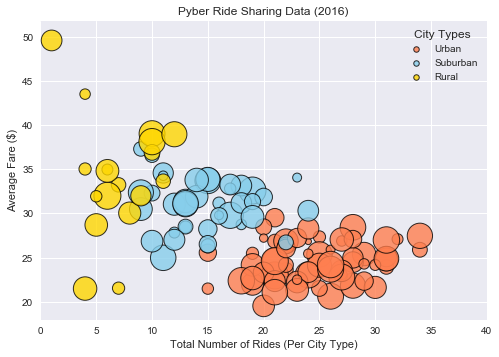

In [8]:
plt.scatter(urbanRideCount, 
            urbanFareAvg, 
            s=10*urbanDriverCount, c="coral",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.scatter(suburbanRideCount, 
            suburbanFareAvg, 
            s=10*urbanDriverCount, c="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")

plt.scatter(ruralRideCount, 
            ruralFareAvg, 
            s=10*urbanDriverCount, c="gold",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City Type)")
plt.xlim((0,40))
plt.grid(True)


lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

In [9]:
# % of Total Fares by City Type
urbanFareTtl=urbancities.sum()["fare"]
suburbanFareTtl=suburbancities.sum()["fare"]
ruralFareTtl=ruralcities.sum()["fare"]

urbanFarePct=(urbanFareTtl/(urbanFareTtl + suburbanFareTtl + ruralFareTtl))*100
suburbanFareTtl=(suburbanFareTtl/(suburbanFareTtl + urbanFareTtl + ruralFareTtl))*100
ruralFareTtl=(ruralFareTtl/(ruralFareTtl + suburbanFareTtl + urbanFareTtl))*100

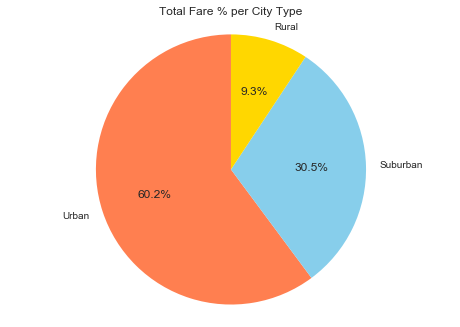

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

cityType = ["Urban", "Suburban", "Rural"]
FarePct = [urbanFarePct, suburbanFareTtl, ruralFareTtl]

colors = ["coral", "skyblue", "gold"]
explode = (0, 0, 0)

x_axis = np.arange(0, len(cityType))

ax.set_title("Total Fare % per City Type")
ax.pie(FarePct, explode=explode, labels=cityType, colors=colors,
       autopct="%1.1f%%", shadow=False, startangle=90)
ax.axis("equal")

plt.show()

In [19]:
# % of Total Rides by City Type
urbanRideTtl=urbancities.count()['ride_id']
suburbanRideTtl=suburbancities.count()['ride_id']
ruralRideTtl=ruralcities.count()['ride_id']

urbanRidePct=(urbanRideTtl/(urbanRideTtl + suburbanRideTtl + ruralRideTtl))*100
suburbanRidePct=(suburbanRideTtl/(suburbanRideTtl + urbanRideTtl + ruralRideTtl))*100
ruralRidePct=(ruralRideTtl/(ruralRideTtl + suburbanRideTtl + urbanRideTtl))*100

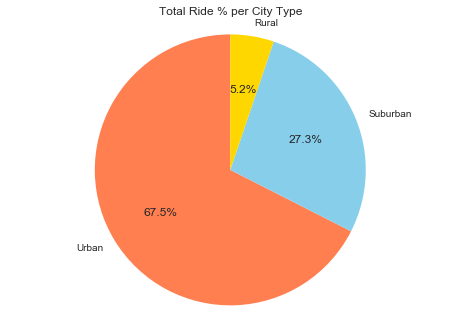

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

cityType = ["Urban", "Suburban", "Rural"]
FarePct = [urbanRidePct, suburbanRidePct, ruralRidePct]

colors = ["coral", "skyblue", "gold"]
explode = (0, 0, 0)

x_axis = np.arange(0, len(cityType))

ax.set_title("Total Ride % per City Type")
ax.pie(FarePct, explode=explode, labels=cityType, colors=colors,
       autopct="%1.1f%%", shadow=False, startangle=90)
ax.axis("equal")

plt.show()

In [13]:
# % of Total Drivers by City Type
urbanDriverTtl=urbancities.sum()['driver_count']
suburbanDriverTtl=suburbancities.sum()['driver_count']
ruralDriverTtl=ruralcities.sum()['driver_count']

urbanDriverPct=(urbanDriverTtl/(urbanDriverTtl + suburbanDriverTtl + ruralDriverTtl))*100
suburbanDriverTtl=(suburbanDriverTtl/(suburbanDriverTtl + urbanDriverTtl + ruralDriverTtl))*100
ruralDriverTtl=(ruralDriverTtl/(ruralDriverTtl + suburbanDriverTtl + urbanDriverTtl))*100

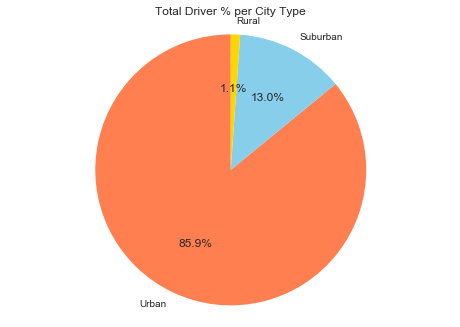

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

cityType = ["Urban", "Suburban", "Rural"]
FarePct = [urbanDriverPct, suburbanDriverTtl, ruralDriverTtl]

colors = ["coral", "skyblue", "gold"]
explode = (0, 0, 0)

x_axis = np.arange(0, len(cityType))

ax.set_title("Total Driver % per City Type")
ax.pie(FarePct, explode=explode, labels=cityType, colors=colors,
       autopct="%1.1f%%", shadow=False, startangle=90)
ax.axis("equal")

plt.show()

In [ ]:
# Bubble chart shows that in Urban cities there are more drivers, more rides, and fares cost the least. In Rural cities there are the least drivers count, the least ride counts, and the fares cost the most.

# Urban cities' total fares ammount take up 60.2% of all total fares, while Suburban cities' fares take up 30.5% and Rural cities' fare take up 9.3%.

# Urban cities' total ride counts take up 67.5% of all total rides, while Suburban cities' total ride counts take up 27.3% and Rural cities' total ride counts take up 5.2%.

# Urban cities' total driver counts take up 85.9% of all total number of drivers, while Suburban cities' total driver counts take up 13.0% and Rural cities ' total driver counts take up just 1.1%.